In [1]:
!pip install pandas-datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

# Time Series Prediction
In this project i'll try some time series prediction.\
First i'll gather the data and select which stock i'll predict.\
Used pandas data_reader to get data from yahoo

In [3]:
Stocks = ['AAPL', 'MSFT', '^GSPC', 'PAMP.BA','PAM','YPF','YPFD.BA','ACN']

In [4]:
start_date = '2000-01-01'
end_date = datetime.datetime.now().strftime('%Y%m%d')

In [5]:
data = data.DataReader(Stocks, data_source='yahoo', start=start_date, end=end_date)

In [6]:
close = data['Close'] #Only closing values

In [7]:
close

Symbols,AAPL,MSFT,^GSPC,PAMP.BA,PAM,YPF,YPFD.BA,ACN
Date,,,,,,,,
2000-01-03,0.999442,58.281250,1455.219971,NaN,NaN,36.3125,36.099998,NaN
2000-01-04,0.915179,56.312500,1399.420044,NaN,NaN,36.0625,36.099998,NaN
2000-01-05,0.928571,56.906250,1402.109985,NaN,NaN,36.2500,36.200001,NaN
2000-01-06,0.848214,55.000000,1403.449951,NaN,NaN,36.0000,35.849998,NaN
2000-01-07,0.888393,55.718750,1441.469971,NaN,NaN,36.3750,36.450001,NaN
...,...,...,...,...,...,...,...,...
2021-03-26,121.209999,236.479996,3974.540039,81.349998,14.10,4.1200,596.099976,280.769989
2021-03-29,121.389999,235.240005,3971.090088,85.199997,14.52,4.0900,591.349976,279.540009
2021-03-30,119.900002,231.850006,3958.550049,86.500000,14.78,4.1200,597.400024,278.549988


In [8]:
weekdays = pd.date_range(start=start_date, end=end_date, freq='B')  # business days only (freq = B)

close = close.reindex(weekdays)

close = close.fillna(method='ffill')

In [9]:
close.isnull().sum()/close.shape[0]

Symbols
AAPL       0.000000
MSFT       0.000000
^GSPC      0.000000
PAMP.BA    0.188819
PAM        0.459693
YPF        0.000000
YPFD.BA    0.000000
ACN        0.072678
dtype: float64

In [10]:
def graph (stock):
    '''graph time series of stock given.
       stock is a string.'''
    feature = close.loc[:, stock]
    
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(feature.index, feature, label=stock)
    ax.set_title(f"Value for stock {stock}\n", fontsize=26)
    ax.tick_params(labelsize=14)    
    ax.legend(fontsize=14)               

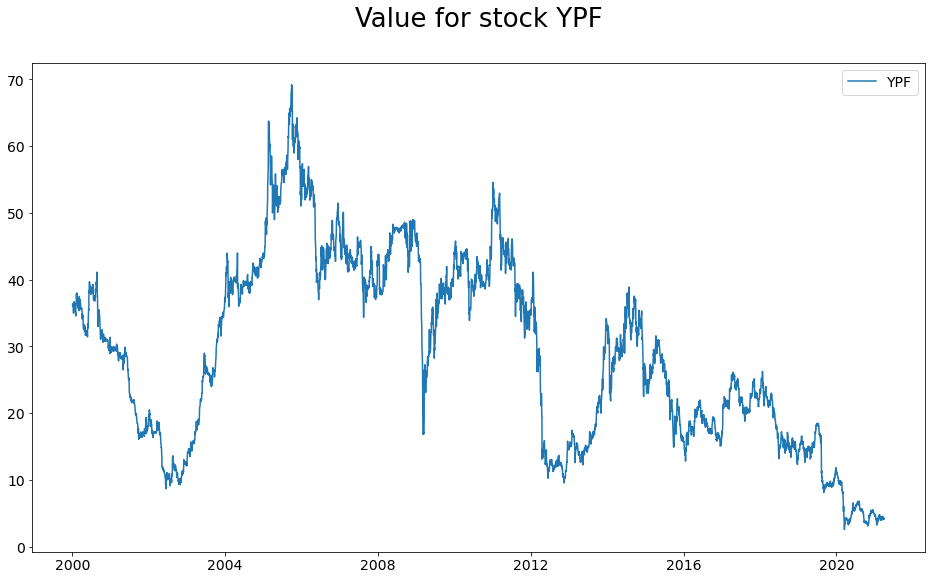

In [11]:
graph ('YPF')

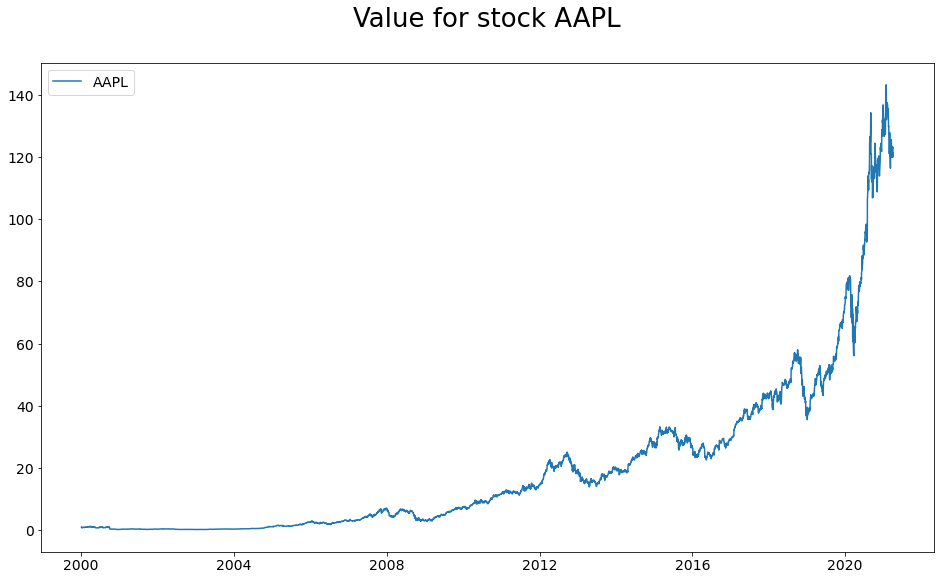

In [12]:
graph ('AAPL')

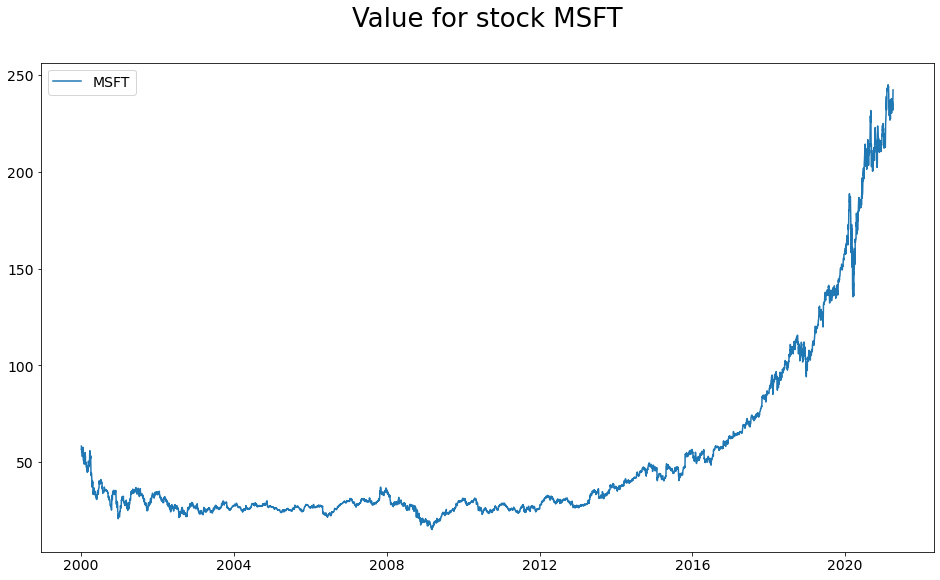

In [13]:
graph ('MSFT')

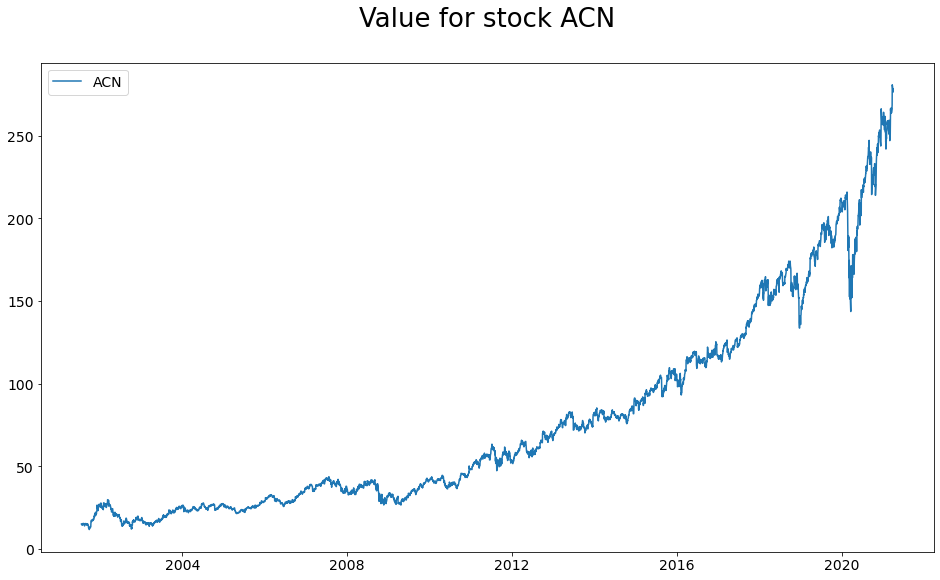

In [14]:
graph ('ACN')

In [15]:
data = close.loc[:, "MSFT"]

Selected MSFT

<AxesSubplot:>

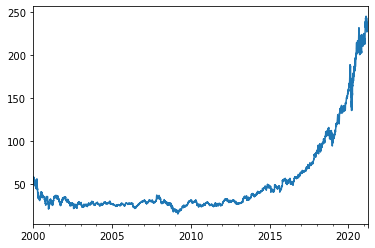

In [16]:
data.plot()

In [17]:
data.to_csv("Data_Microsoft.csv")